In [1]:
import base64
import zmq
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
context = zmq.Context()
socket = context.socket(zmq.REQ)
socket.connect("tcp://localhost:5555")

Sending request 1 ...
Received reply from server
Sending request 2 ...
Received reply from server
Sending request 3 ...
Received reply from server
Sending request 4 ...
Received reply from server
Sending request 5 ...
Received reply from server


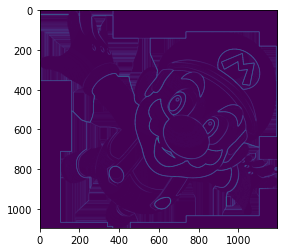

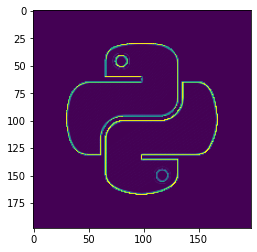

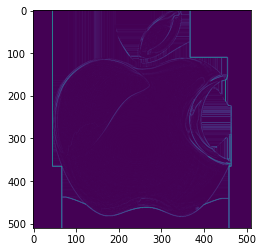

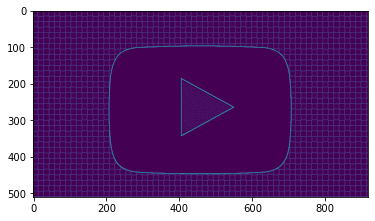

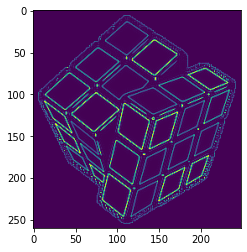

In [3]:
#  Do requests, waiting each time for a response
for request in range(1,6):
    print("Sending request "+str(request)+" ...")
    f = open("./dataset/"+str(request)+".png",'rb')
    bytes = bytearray(f.read())
    strng = base64.b64encode(bytes)
    socket.send(strng)
    f.close()

    #  Get the reply
    message = socket.recv()
    print("Received reply from server")
    ba = bytearray(base64.b64decode(message))
    f = open("./results/client1/"+str(request)+".png", 'wb')
    f.write(ba)
    f.close()
    #####################################################
    img=mpimg.imread("./results/client1/"+str(request)+".png")
    plt.figure(request)
    plt.imshow(img)